In [1]:
import tensorflow as tf

In [25]:
x = tf.random.normal([2,4])
w = tf.random.normal([4,3])
b = tf.zeros([3])
y = tf.constant([2,0])

In [16]:
with tf.GradientTape() as tape:
    tape.watch([w,b])
    prob = tf.nn.softmax(x@w+b, axis=1)
    loss = tf.reduce_mean(tf.losses.MAE(tf.one_hot(y,depth=3),prob))
grads = tape.gradient(loss,[w,b])
grads[0]

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.03229531, -0.00177794, -0.03051736],
       [-0.15930337,  0.05990004,  0.09940332],
       [-0.06333019,  0.04038769,  0.02294249],
       [ 0.10655233, -0.11008611,  0.0035338 ]], dtype=float32)>

In [32]:
with tf.GradientTape() as tape:
    tape.watch([w,b])
    logist = x @ w + b
    loss = tf.reduce_mean(tf.losses.categorical_crossentropy(tf.one_hot(y,depth=3),logist,from_logits=True))
grad = tape.gradient(loss,[w,b])
grad[0],grad[1]

(<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
 array([[-0.05606111, -0.06620245,  0.12226358],
        [ 0.04800208,  0.09035508, -0.13835712],
        [-0.02328924, -0.05796822,  0.08125743],
        [-0.01856192, -0.0573084 ,  0.07587028]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.10021881,  0.16932255, -0.26954132], dtype=float32)>)

x,y (120,) (120,)
X,Y (120, 120) (120, 120)


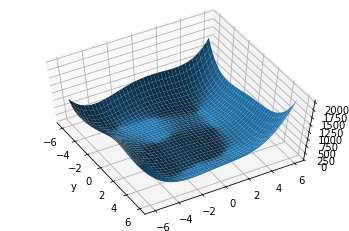

step 0: x = [-2.98       -0.09999999], f(x) = 146.0
step 20: x = [-3.6890159 -3.1276689], f(x) = 6.054703235626221
step 40: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 60: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 80: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 100: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 120: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 140: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 160: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 180: x = [-3.7793102 -3.283186 ], f(x) = 0.0


In [35]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
def himmelblau(x):
    return (x[0]**2 + x[1]-11) **2 +(x[0] + x[1]**2 -7)**2

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y',x.shape,y.shape)
X,Y = np.meshgrid(x,y)
print('X,Y',X.shape,Y.shape)
Z = himmelblau([X,Y])

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_xlabel('y')
plt.show()

x = tf.Variable([-4.,0.])

for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
    grad = tape.gradient(y, [x])
#     x.assign_sub(0.01 * grad[0])
    x.assign_sub(0.01 * grad[0])
    if step % 20 == 0:
         print('step {}: x = {}, f(x) = {}'.format(step, x.numpy(), y.numpy()))
